# Data Challenge 1
Goal: In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

##Data Overview
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers

##Hints
What are the main factors that drive employee churn? Do they make sense? Explain your findings.
What might you be able to do for the company to address employee Churn, what would be follow-up actions?
If you could add to this data set just one variable that could help explain employee churn, what would that be?
Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.

In [0]:
from __future__ import print_function

import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy as sp

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#EDA
lets start off by loading in the data (in this case from our Google Drive)and performing some EDA on it to get an idea of what the data looks like and which features might be important

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data Challenge 1/employee_retention_data.csv")

In the given dataset, we have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics. Here, we can find the average of both the groups using groupby() and mean() function.

In [0]:
df['left'] = np.where(df['quit_date'].isnull(), 1, 0)

In [0]:
df['quit_date'] = df['quit_date'].replace(np.nan, '2015-12-13', regex=True)
df['quit_date'] = pd.to_datetime(df['quit_date'])
df['join_date'] = pd.to_datetime(df['join_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      24702 non-null datetime64[ns]
left           24702 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [0]:

df['tenure'] = ((df.quit_date - df.join_date)/np.timedelta64(1, 'M'))
df['tenure'] = df['tenure'].astype(int)

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 9 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      24702 non-null datetime64[ns]
left           24702 non-null int64
tenure         24702 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 1.7+ MB


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,left,tenure
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,19
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0,11
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,1,13
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,12
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,34


In [9]:
left = df.groupby(['left'])
print(left.mean())

print('Counts:')
print(df.left.value_counts())

        employee_id  company_id  seniority         salary     tenure
left                                                                
0     502039.463138    3.459511  14.131458  135652.405625  19.661806
1     501079.237759    3.387688  14.123392  141238.473910  16.824607
Counts:
0    13510
1    11192
Name: left, dtype: int64


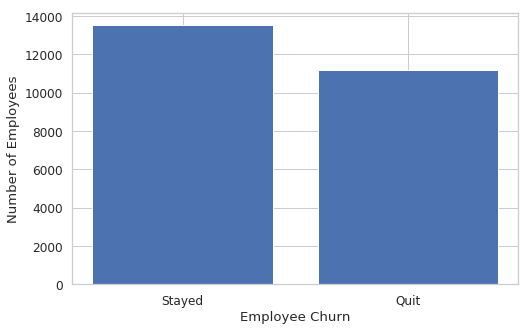

In [10]:
left_count=df.groupby('left').count()
plt.bar(left_count.index.values, left_count['salary'])
plt.xlabel('Employee Churn')
plt.ylabel('Number of Employees')
plt.xticks(np.arange(0, 2, 1.0),['Stayed','Quit'])
plt.show()

 let’s store the features names in three list to make it easy for us to generate the appropriate plots, etc

In [0]:
numerical = ['employee_id','seniority', 'salary','tenure']
categorical = ['company_id','dept','left']
date = ['join_date','quit_date']

In [0]:
features=numerical+categorical

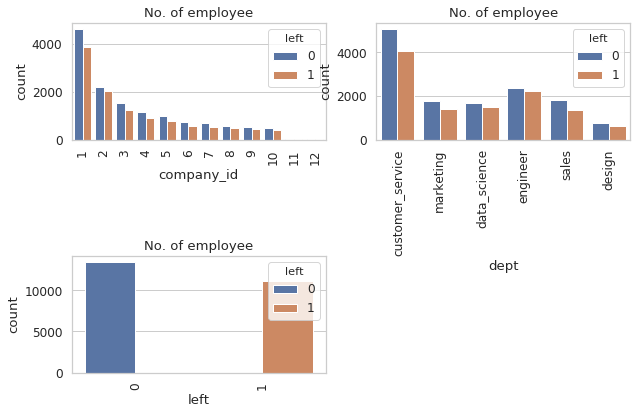

In [13]:
#@title Default title text
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(categorical):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

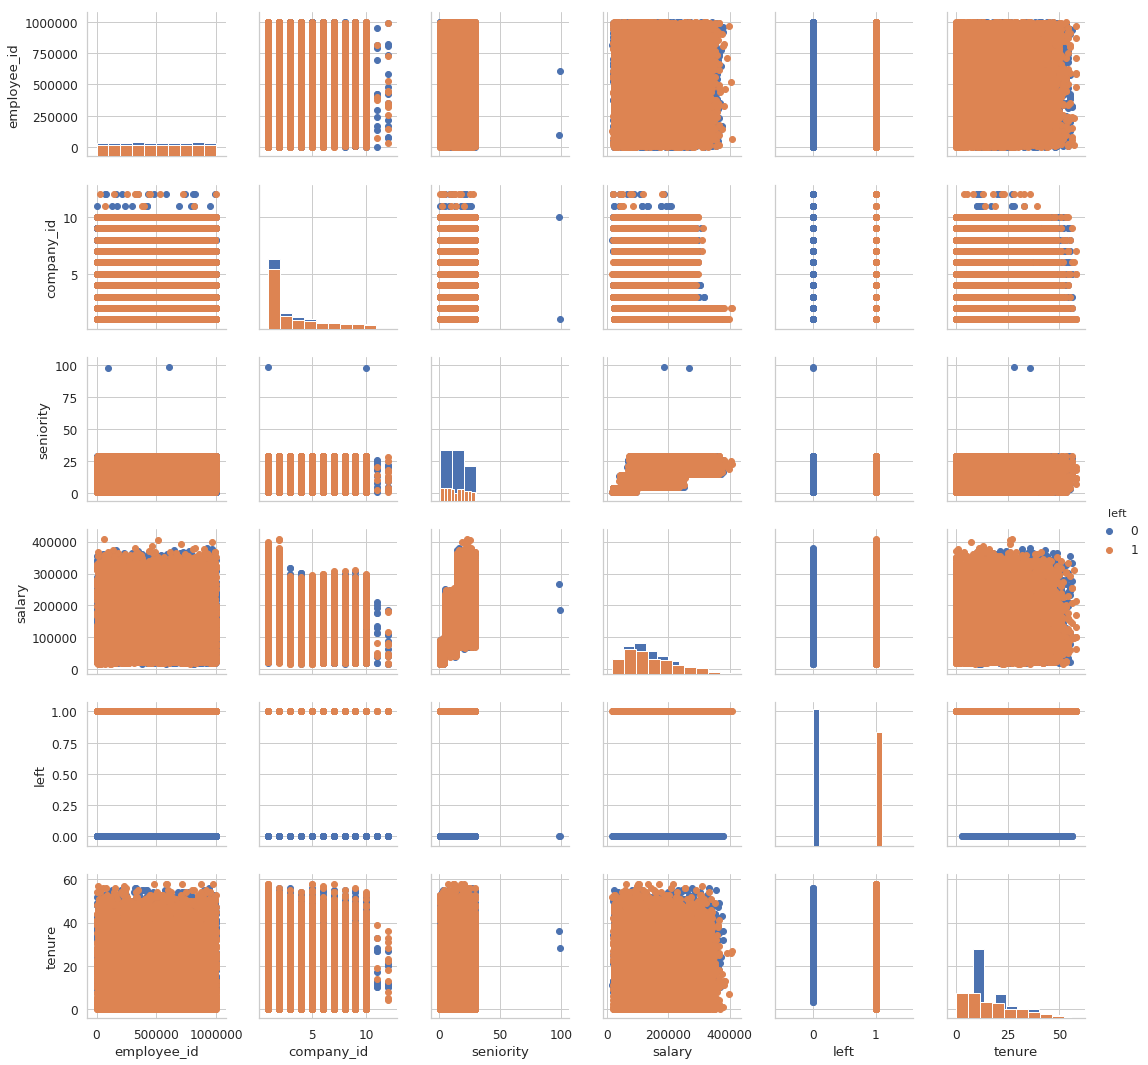

In [14]:
g = sns.PairGrid(df, hue="left")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

#Get to the Primary Question: When will people quit
We want to predict when people will quick, so we can pick out just the data for people who quit (left =1) and look for trends in that data.

In [15]:
df_left = df.loc[df['left'] == 1]
df_left.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,left,tenure
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,1,13
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13,1,25
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2015-12-13,1,21
9,504159.0,1,sales,7,104000.0,2012-06-12,2015-12-13,1,42
11,904158.0,2,marketing,17,230000.0,2015-05-11,2015-12-13,1,7


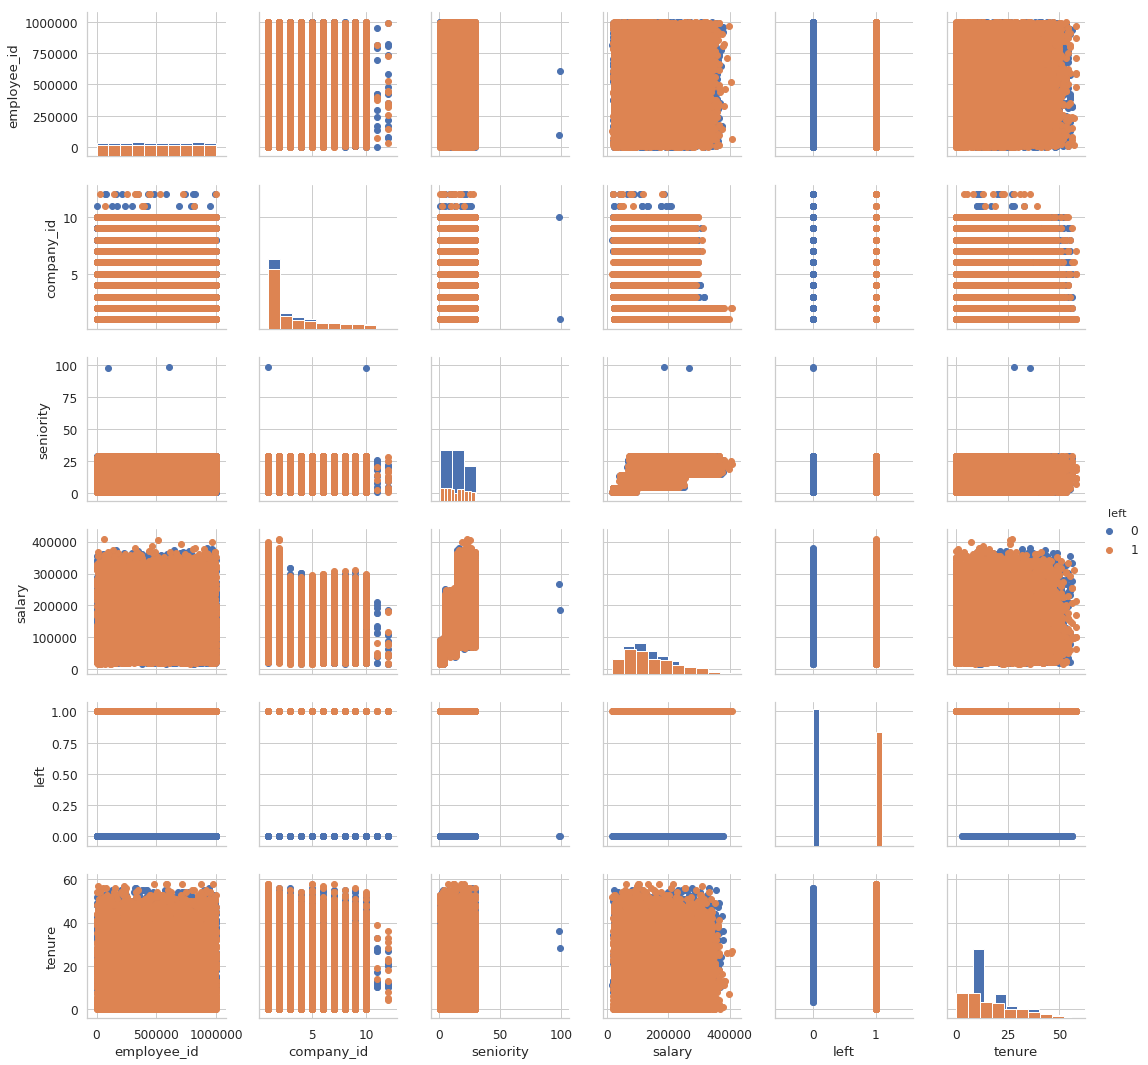

In [16]:
g = sns.PairGrid(df, hue="left")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

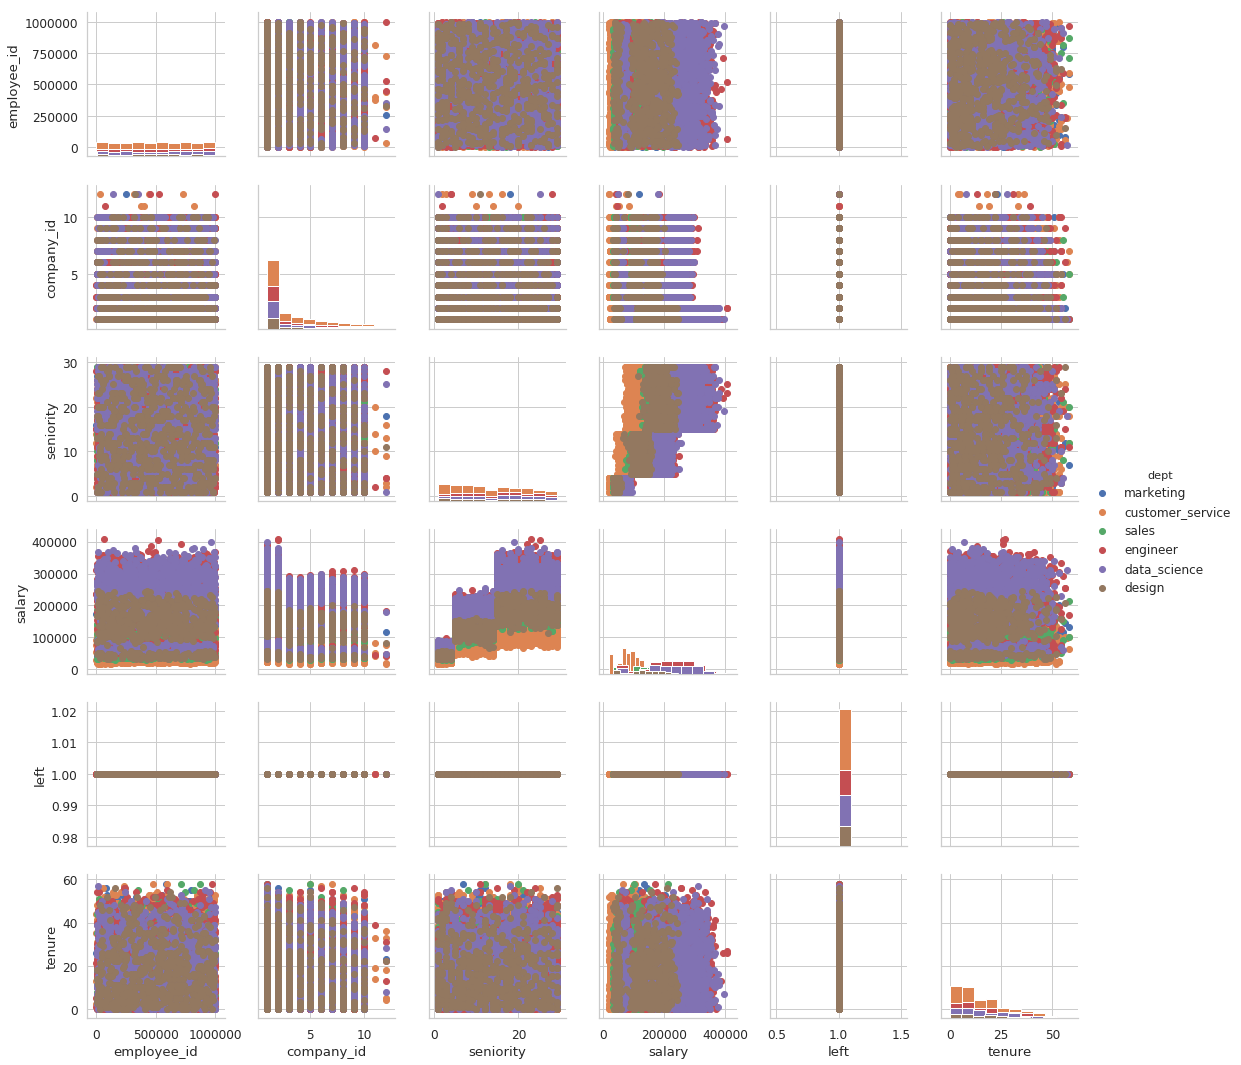

In [17]:
g = sns.PairGrid(df_left, hue='dept')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

#Insights from the Data
 Since we are concerned time when they might leave, we need to figure out if there are any correlations between tenure of those how left and the other variables.  We don't really care about employee ID, since it doesn't contain any actionable information, so we will exclude that from our calculations.
 
 The only variable that seems to have any correlation is salary with a PMCC of .04.  All other variables are an order less correlated.  This correlation is even stronger when we group by department. 
 
 This means that our model will need to take in two features in order to predict the total tenure time before and employee leaves: The department and their salary


In [18]:
df_left[df_left.columns[1:]].corr()['tenure'][:-2]

company_id   -0.009139
seniority    -0.001126
salary        0.041660
Name: tenure, dtype: float64

In [19]:
df_left.groupby('dept')['salary','seniority','tenure','company_id'].corr()

salary  seniority    tenure  company_id
dept                                                                  
customer_service salary      1.000000   0.816492 -0.067829   -0.198598
                 seniority   0.816492   1.000000 -0.060916    0.014792
                 tenure     -0.067829  -0.060916  1.000000   -0.009409
                 company_id -0.198598   0.014792 -0.009409    1.000000
data_science     salary      1.000000   0.806700  0.055390   -0.298814
                 seniority   0.806700   1.000000  0.052394   -0.087433
                 tenure      0.055390   0.052394  1.000000   -0.030074
                 company_id -0.298814  -0.087433 -0.030074    1.000000
design           salary      1.000000   0.816724 -0.020932   -0.234985
                 seniority   0.816724   1.000000 -0.020990   -0.035843
                 tenure     -0.020932  -0.020990  1.000000   -0.011459
                 company_id -0.234985  -0.035843 -0.011459    1.000000
engineer         salary      1.000000   0.808939  0.081672   -0.232890
                 seniority   0.808939   1.000000  0.080123   -0.008384
                 tenure      0.081672   0.080123  1.000000   -0.013052
                 company_id -0.232890  -0.008384 -0.013052    1.000000
marketing        salary      1.000000   0.824150 -0.017944   -0.223803
                 seniority   0.824150   1.000000 -0.030738   -0.035531
                 tenure     -0.017944  -0.030738  1.000000   -0.011794
                 company_id -0.223803  -0.035531 -0.011794    1.000000
sales            salary      1.000000   0.816950 -0.049412   -0.264780
                 seniority   0.816950   1.000000 -0.006249   -0.046174
                 tenure     -0.049412  -0.006249  1.000000    0.036257
                 company_id -0.264780  -0.046174  0.036257    1.000000

In [20]:
df_left.groupby('dept')['salary','seniority','tenure','company_id'].mean()

,salary,seniority,tenure,company_id
dept,,,,
customer_service,79656.387665,13.715859,16.292462,3.461576
data_science,215387.931034,14.959549,17.823607,3.390584
design,134325.581395,13.720930,17.074751,3.307309
engineer,212515.326522,14.703243,17.694802,3.261661
marketing,134213.150289,13.770954,16.139451,3.421243
sales,136277.002204,13.997796,16.462160,3.372520


In [21]:
df_left.groupby('dept')['salary','seniority','tenure','company_id'].mean().corr()

,salary,seniority,tenure,company_id
salary,1.000000,0.924011,0.877840,-0.606164
seniority,0.924011,1.000000,0.867773,-0.376658
tenure,0.877840,0.867773,1.000000,-0.647676
company_id,-0.606164,-0.376658,-0.647676,1.000000


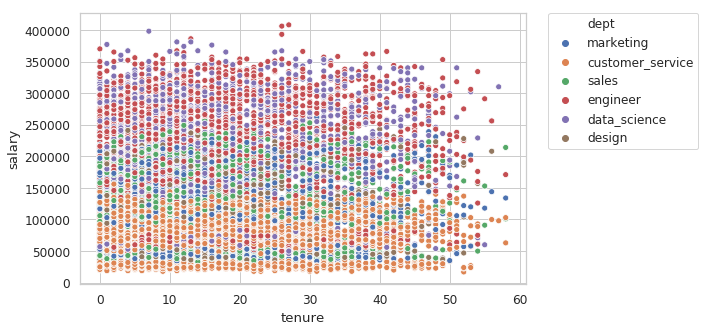

In [22]:
ax = sns.scatterplot(x="tenure", y="salary", data=df_left, hue='dept')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Model Time
Having identified some interesting features, and seen that the data isn't the prettiest,  let's try random forest regressor to try and predict tenure time.

In [0]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [0]:
def rfr_model(X, y):
# Perform Grid-Search
  gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
  grid_result = gsc.fit(X, y)
    
  rfr = grid_result.best_estimator_ #RandomForestRegressor(**grid_result.best_estimator_)
# Perform K-Fold CV
# scores = cross_val_predict(rfr, X, y, cv=10,
#                            scoring='neg_mean_absolute_error')
  prediction = rfr.predict(X)
  scores = mean_absolute_error(y,prediction)
  return scores

In [0]:
X = df_left[['dept','salary','company_id']]
X = pd.get_dummies(X, prefix=['dept'], columns=['dept'])
y = df_left['tenure']

In [26]:
X.head()

,salary,company_id,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
2,101000.0,4,0,0,0,0,1,0
6,107000.0,4,1,0,0,0,0,0
7,30000.0,2,1,0,0,0,0,0
9,104000.0,1,0,0,0,0,0,1
11,230000.0,2,0,0,0,0,1,0


In [0]:
scores = rfr_model(X,y)

In [30]:
scores

10.620361526220883

#Wrap-up
Here we implemented a random forest regressor to predict how long before someone who will quit, which can get within 10mo of their quit date without too much tuning.

Question: What are the main factors that cause churn

-From the data given, It looks like the main predictors are the department the employee belongs and their salary.  This makes some sense, as those in highest paying departments (data science and engineering) had the highest tenure length and reduced total number of employees churn.

-From this data it also appears that most of the employees who quit are leaving after a little more than a year, so the companies can take preventative measures: offer raises, inititate conversations with employees, etc.

-If I could add one variable, I would add like to see employee satisfaction.  This would give an insight into how happy they are with their current position and possibly alert management well before an employee quits as it falls.
